# Analysis for Differential Jet Mass in Z+Jets events with NanoAODv9

In [1]:
import awkward as ak
import numpy as np
import time
import coffea
import uproot
import hist
import vector
print("awkward version ", ak.__version__)
print("coffea version ", coffea.__version__)
from coffea import util, processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema, BaseSchema
from collections import defaultdict
import pickle

import dask
#from distributed.diagnostics.plugin import UploadDirectory
import os
#from cms_utils import *
print("numpy version", np.__version__)
print("dask version", dask.__version__)

awkward version  1.10.3
coffea version  0.7.22
numpy version 1.23.5
dask version 2023.3.1


### Automatically reload any modules used

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:

from python.response_maker_nanov9_lib import *
from python.response_maker_nanov9 import *
from python.smp_utils import *
from python.cms_utils import *

In [4]:
#f = uproot.open("root://xcache//store/mc/RunIISummer20UL16NanoAODv9/DYJetsToLL_M-50_HT-100to200_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v2/260000/18D0A087-30BD-FE4E-B447-5F493C2D2794.root")

In [5]:
#f["Events"].keys()

In [6]:
# from dask.distributed import Client

# client = Client("tls://192.168.86.46:8786")
# client

# client.register_worker_plugin(UploadDirectory("/home/ZJet/QJetMassUproot/", restart=True, update_path=True))
# #print(client.run(os.listdir, "dask-worker-space") )
# client.scheduler_info()['workers']

In [7]:
from distributed import Client
from lpcjobqueue import LPCCondorCluster

cluster = LPCCondorCluster(transfer_input_files = [ "correctionFiles", "samples", "python"], 
                           ship_env = False,
                           memory = "5GB",
                          scheduler_options={"dashboard_address": ":2018"})
cluster.adapt(minimum=0, maximum=10000)


client = Client(cluster)
client

Connection method: Cluster object,Cluster type: lpcjobqueue.LPCCondorCluster
Dashboard: http://131.225.191.74:2018/status,
Dashboard: http://131.225.191.74:2018/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://131.225.191.74:10064,Workers: 0
Dashboard: http://131.225.191.74:2018/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [8]:
# client.register_worker_plugin(UploadDirectory("/home/ZJet/QJetMassUproot/", restart=True, update_path=True), nanny=True)
# #print(client.run(os.listdir, "dask-worker-space") )

### If desired, uncomment these to move or remove old pkl files

In [9]:
#! mv qjetmass_zjets_gen.pkl qjetmass_zjets_gen_old.pkl
#! mv qjetmass_zjets_reco.pkl qjetmass_zjets_reco_old.pkl

In [10]:
# client.scheduler_info()['workers']

### If you want to rerun, here is the line. Otherwise keep it commented to just read the pkl file. 

In [11]:
#client = Client(cluster)
#print(client.run(os.listdir) )
#client.scheduler_info()['workers']

In [12]:


# eras_mc = ['UL16NanoAODv9']
# for era in eras_mc:
#     response_maker_nanov9(testing=False, do_gen=True, client=client, prependstr="root://cmsxrootd.fnal.gov/", eras_mc=[era], jet_syst = 'nominal', dask = True)
#     #response_maker_nanov9(testing=False, do_gen=False, client=client)
#     print("Done running 2016")
    

In [13]:
eras_mc = ['UL16NanoAODv9','UL17NanoAODv9','UL18NanoAODv9']
#client= None
response_maker_nanov9(testing=False, do_gen=True, client=client, prependstr="root://cmsxrootd.fnal.gov/", eras_mc=eras_mc, do_syst = True, do_jk = False, dask = True, fname_out = 'outputs/gen_with_asym_pt_fineMbin_jet_syst.pkl')
#response_maker_nanov9(testing=False, do_gen=False, client=client)
print("Done running All")


Chunk Size  100000
Running...
[##########                              ] | 25% Completed | 28min 42.2ss

Failed to commit and disconnect from queue.


[###########                             ] | 28% Completed | 30min 38.6s

Task exception was never retrieved
future: <Task finished name='Task-637171' coro=<_wrap_awaitable() done, defined at /opt/conda/lib/python3.10/site-packages/distributed/deploy/spec.py:118> exception=AssertionError()>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/deploy/spec.py", line 119, in _wrap_awaitable
    return await aw
  File "/opt/conda/lib/python3.10/site-packages/distributed/deploy/spec.py", line 69, in _
    assert self.status == Status.running
AssertionError


Done running#############################] | 100% Completed |  1hr 19min 54.7s
outputs/gen_with_asym_pt_fineMbin_jet_syst.pkl  was created.
Done running All


In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

In [1]:
import pickle
with open("qjetmass_zjets_gen__all_syst.pkl", "rb") as f:
    output = pickle.load( f )

In [2]:
output['cutflow']

{'UL16NanoAODv9': defaultdict(int,
             {'DYJetsToLL_M-50_HT-100to200_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8': defaultdict(int,
                          {'all events': 7949477,
                           'weights cut': 7649419,
                           'npv': 7649419,
                           'oneGenJet': 258087,
                           'matches': 7632476,
                           'misses': 16943,
                           'twoGen_ee': 461523,
                           'twoGen_mm': 920069,
                           'twoGen_leptons': 1381592,
                           'z_ptcut_gen': 652562,
                           'z_mcut_gen': 1299279,
                           'z_jet_dphi_sel_gen': 159504,
                           'z_pt_asym_sel_gen': 172926,
                           'kinsel_gen': 59576,
                           'toposel_gen': 104392,
                           'allsel_gen': 54547,
                           'twoReco_ee': 239844,
                  

In [ ]:
import pickle
with open("jackknife_output_5to9.pkl", "rb") as f:
    output_jk = pickle.load( f )
for i in range(5):
    output_jk["jackknife_response_g"].project('jk', 'bin_reco')[i,:].plot()

In [ ]:
output_jk["tunfold_migration_u"]

In [4]:
import pickle
with open("qjetmass_zjets_reco.pkl", "rb") as f:
    output = pickle.load( f )

In [8]:
output["tunfold_migration_u"][{'systematic': 'nominal'}].project('bin_reco')

KeyError: "'nominal' not in axis"

In [17]:
output["tunfold_reco_g"].project('bin_reco').axes['bin_reco']

Regular(90, 0, 90, name='bin_reco', label='Detector')

In [6]:
output["tunfold_reco_g"][{'systematic': 'nominal'}].project('bin_reco')

Hist(Regular(90, 0, 90, name='bin_reco', label='Detector'), storage=Weight()) # Sum: WeightedSum(value=142379, variance=43557.4)

In [19]:
output["tunfold_migration_u"][{'systematic': 'nominal'}].project('bin_gen').axes['bin_gen']

Regular(77, 0, 77, name='bin_gen', label='Generator')

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f79e1115f60>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

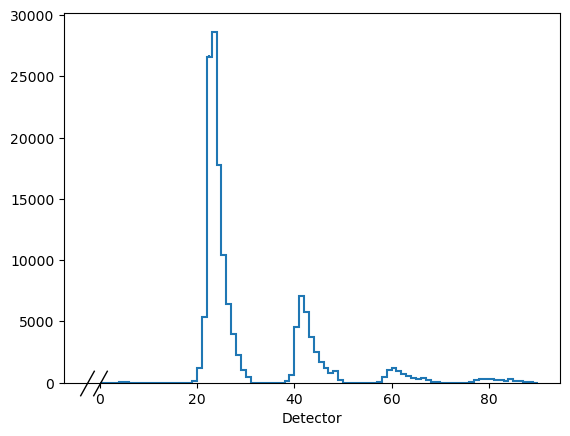

In [10]:
output["tunfold_reco_u"][{'systematic': 'nominal'}].project('bin_reco').plot()

In [21]:
import pickle
with open("qjetmass_zjets_reco.pkl", "rb") as f:
    output = pickle.load( f )

In [22]:
output["tunfold_reco_g"][{'systematic': 'nominal'}].project('bin_reco')

Hist(Regular(90, 0, 90, name='bin_reco', label='Detector'), storage=Weight()) # Sum: WeightedSum(value=169927, variance=169927)

In [18]:
#len(f["Events"]['reco_jet_pt'].arrays())

### Open pkl file for the output histograms

In [95]:
import pickle
with open("qjetmass_zjets_reco.pkl", "rb") as f:
    output = pickle.load( f )

In [116]:
import pickle
with open("qjetmass_zjets_gen__all_syst.pkl", "rb") as f:
    output = pickle.load( f )

In [117]:
import pickle
with open("test_qjetmass_zjets_gen_UL16NanoAODv9_all_syst.pkl", "rb") as f:
    output = pickle.load( f )

In [118]:
output.keys()

dict_keys(['njet_gen', 'puweight', 'pdfweight', 'elerecoweight', 'murecoweight', 'muidweight', 'q2weight', 'mutrigweight', 'prefiringweight', 'njet_reco', 'ptjet_gen_pre', 'ptjet_mjet_u_gen', 'ptjet_mjet_u_reco', 'ptjet_mjet_g_gen', 'ptjet_mjet_g_reco', 'ptjet_reco_over_gen', 'drjet_reco_gen', 'ptz_gen', 'ptz_reco', 'mz_gen', 'mz_reco', 'mz_reco_over_gen', 'fakes', 'misses', 'dr_z_jet_gen', 'dr_z_jet_reco', 'dphi_z_jet_gen', 'dphi_z_jet_reco', 'ptasym_z_jet_gen', 'ptasym_z_jet_reco', 'ptfrac_z_jet_gen', 'ptfrac_z_jet_reco', 'm_u_jet_reco_over_gen', 'm_g_jet_reco_over_gen', 'dr_gen_subjet', 'dr_reco_to_gen_subjet', 'response_matrix_u', 'response_matrix_g', 'cutflow'])

In [15]:
import pickle
with open("test_qjetmass_zjets_gen_UL16NanoAODv9_all_syst.pkl", "rb") as f:
    output = pickle.load( f )

In [16]:
output["cutflow"]

{'UL16NanoAODv9': defaultdict(int,
             {'all events': 1014,
              'weights cut': 1014,
              'npv': 1014,
              'oneGenJet': 1013,
              'matches': 869,
              'misses': 145,
              'twoGen_ee': 144,
              'twoGen_mm': 162,
              'twoGen_leptons': 306,
              'z_ptcut_gen': 256,
              'z_mcut_gen': 285,
              'z_jet_dphi_sel_gen': 661,
              'z_pt_asym_sel_gen': 124,
              'kinsel_gen': 238,
              'toposel_gen': 80,
              'allsel_gen': 55,
              'twoReco_ee': 41,
              'twoReco_mm': 72,
              'number of electron or muon is 2': 455,
              'twoReco_leptons': 113,
              'z_ptcut_reco': 281,
              'z_mcut_reco': 199,
              'oneRecoJet': 1013,
              'z_jet_dphi_sel_reco': 76,
              'z_pt_asym_sel_reco': 27,
              'kinsel_reco': 83,
              'toposel_reco': 15,
              'presel_r

In [121]:

cutflow_percent = {}
for era in output["cutflow"].keys():
    cutflow_percent.update({era:{}})
    for key in output["cutflow"][era].keys():
        cutflow_percent[era].update({key: 100*output['cutflow'][era][key]/output['cutflow'][era]['trigsel']})

ZeroDivisionError: division by zero

In [122]:
cutflow = {}
for sel in output["cutflow"]['UL16NanoAODv9_DYJetsToLL_M-50_HT-100to200_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8'].keys():
    cutflow[sel] = 0

for sel in output["cutflow"]['UL16NanoAODv9_DYJetsToLL_M-50_HT-100to200_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8'].keys():
    for key in output["cutflow"].keys():
        cutflow[sel]+= output["cutflow"][key][sel]

In [18]:
output['ptjet_mjet_u_reco']

Hist(
  StrCategory(['UL16NanoAODv9'], growth=True, name='dataset', label='Primary dataset'),
  Variable([170, 200, 260, 350, 460, 13000], name='ptreco', label='p_{T,RECO} (GeV)'),
  Variable([0, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200, 6200, 13000], name='mreco', label='m_{RECO} (GeV)'),
  StrCategory(['nominal', 'puUp', 'puDown'], growth=True, name='systematic', label='Systematic Uncertainty'),
  storage=Weight()) # Sum: WeightedSum(value=151.086, variance=875.019)

In [124]:
cutflow_percent = {}
for key in cutflow.keys():
    cutflow_percent[key] = 100*(cutflow[key]/cutflow['all events'])
cutflow_percent

{'all events': 100.0,
 'weights cut': 81.66860561741733,
 'npv': 81.66860561741733,
 'oneGenJet': 60.09639355160379,
 'matches': 71.77995678909755,
 'misses': 9.888648828319761,
 'twoGen_ee': 9.041050357320925,
 'twoGen_mm': 12.414824663453548,
 'twoGen_leptons': 21.455875020774474,
 'z_ptcut_gen': 15.539305301645337,
 'z_mcut_gen': 19.710819345188632,
 'z_jet_dphi_sel_gen': 39.30530164533821,
 'z_pt_asym_sel_gen': 11.716802393219213,
 'kinsel_gen': 12.813694532158884,
 'toposel_gen': 7.711484128303141,
 'allsel_gen': 3.805883330563404,
 'twoReco_ee': 3.074621904603623,
 'number of electron is 2': 20.824331061991025,
 'ptcut_e2': 39.90360644839621,
 'ptcut_e': 35.74871198271563,
 'eta_cut_e': 81.25311617084925,
 'opposite_signed_ee': 41.00049858733588,
 'pfRelIso_cut_e': 44.80638191789929,
 'cutBased_e': 38.80671430945654,
 'twoReco_mm': 6.697689878677082,
 'number of muon is 2': 18.03224198105368,
 'ptcut_m2': 50.19112514542131,
 'eta_cut_m': 81.60212730596643,
 'opposite_signed_mm': 

In [131]:
import pickle
with open("test_qjetmass_zjets_reco.pkl", "rb") as f:
    output = pickle.load( f )

In [132]:
output["cutflow"]

{'UL2018': defaultdict(int,
             {'trigsel': 82568,
              'npv': 99077,
              'twoReco_ee': 0,
              'number of electron is 2': 2248,
              'ptcut_e2': 84156,
              'ptcut_e': 1748,
              'eta_cut_e': 98733,
              'opposite_signed_ee': 84169,
              'pfRelIso_cut_e': 87252,
              'cutBased_e': 84381,
              'twoReco_mm': 3276,
              'number of muon is 2': 21845,
              'ptcut_m2': 57212,
              'eta_cut_m': 99003,
              'opposite_signed_mm': 13951,
              'pfRelIso_cut_m': 74054,
              'looseId_m': 85046,
              'number of electron or muon is 2': 23422,
              'twoReco_leptons': 3276,
              'z_ptcut_reco': 4321,
              'z_mcut_reco': 6411,
              'oneRecoJet': 8039,
              'z_jet_dphi_sel_reco': 14,
              'z_pt_asym_sel_reco': 18,
              'kinsel_reco': 13,
              'toposel_reco': 5,
           

In [133]:
cutflow_percent = {}
for era in output["cutflow"].keys():
    cutflow_percent.update({era:{}})
    for key in output["cutflow"][era].keys():
        cutflow_percent[era].update({key: 100*output['cutflow'][era][key]/output['cutflow'][era]['npv']})

2024-05-14 08:57:14,006 - tornado.application - ERROR - Uncaught exception GET /workers/ws (127.0.0.1)
HTTPServerRequest(protocol='http', host='127.0.0.1:8883', method='GET', uri='/workers/ws', version='HTTP/1.1', remote_ip='127.0.0.1')
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/tornado/websocket.py", line 937, in _accept_connection
    open_result = handler.open(*handler.open_args, **handler.open_kwargs)
  File "/opt/conda/lib/python3.10/site-packages/tornado/web.py", line 3290, in wrapper
    return method(self, *args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/bokeh/server/views/ws.py", line 149, in open
    raise ProtocolError("Token is expired.")
bokeh.protocol.exceptions.ProtocolError: Token is expired.
ERROR:tornado.application:Uncaught exception GET /workers/ws (127.0.0.1)
HTTPServerRequest(protocol='http', host='127.0.0.1:8883', method='GET', uri='/workers/ws', version='HTTP/1.1', remote_ip='127.0.0.1')
Traceback (most rec

In [130]:
cutflow_percent

{'UL2018': {'trigsel': 83.33720237794846,
  'npv': 100.0,
  'twoReco_ee': 0.0,
  'number of electron is 2': 2.268942337777688,
  'ptcut_e2': 84.93999616459925,
  'ptcut_e': 1.7642843444997325,
  'eta_cut_e': 99.65279530062476,
  'opposite_signed_ee': 84.95311727242448,
  'pfRelIso_cut_e': 88.06483845897635,
  'cutBased_e': 85.16709226157433,
  'twoReco_mm': 3.3065191719571647,
  'number of muon is 2': 22.048507726313876,
  'ptcut_m2': 57.744986222836786,
  'eta_cut_m': 99.92531061699486,
  'opposite_signed_mm': 14.080967328441515,
  'pfRelIso_cut_m': 74.74388606841144,
  'looseId_m': 85.83828739263402,
  'number of electron or muon is 2': 23.64019903711255,
  'twoReco_leptons': 3.3065191719571647,
  'z_ptcut_reco': 4.361254377908092,
  'z_mcut_reco': 6.470724789809946,
  'oneRecoJet': 8.113891215922969,
  'z_jet_dphi_sel_reco': 0.014130423811782755,
  'z_pt_asym_sel_reco': 0.0181676877580064,
  'kinsel_reco': 0.013121107825226843,
  'toposel_reco': 0.005046579932779556,
  'presel_reco'

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f186a8f6e60>, errorbar=None, legend_artist=None)]

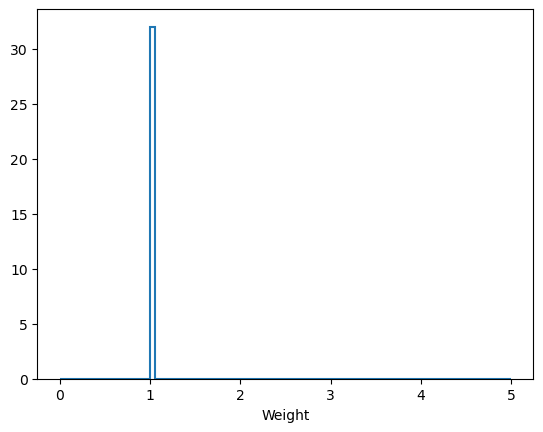

In [38]:
output['weight'].project('corrWeight').plot()

In [23]:
output['response_matrix_g'].

Hist(
  StrCategory([], growth=True, name='dataset', label='Primary dataset'),
  Variable([170, 200, 260, 350, 460, 13000], name='ptreco', label='p_{T,RECO} (GeV)'),
  Variable([0, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200, 6200, 13000], name='mreco', label='m_{RECO} (GeV)'),
  Variable([170, 200, 260, 350, 460, 13000], name='ptgen', label='p_{T,RECO} (GeV)'),
  Variable([0, 10, 20, 40, 60, 80, 100, 150, 200, 13000], name='mgen', label='Mass (GeV)'),
  StrCategory([], growth=True, name='systematic', label='Systematic Uncertainty'),
  storage=Weight()) # Sum: WeightedSum(value=0, variance=0)

In [18]:
response_matrix_u_values = output['response_matrix_u'].project("ptreco", "mreco", "ptgen", "mgen").values()
response_matrix_g_values = output['response_matrix_g'].project("ptreco", "mreco", "ptgen", "mgen").values()

In [19]:
nptreco,nmassreco,nptgen,nmassgen = response_matrix_u_values.shape

In [20]:
response_matrix_u_final = response_matrix_u_values.reshape( (nptreco)*(nmassreco), (nptgen)*(nmassgen) )

In [29]:
response_matrix_g_final = response_matrix_g_values.reshape( (nptreco)*(nmassreco), (nptgen)*(nmassgen) )

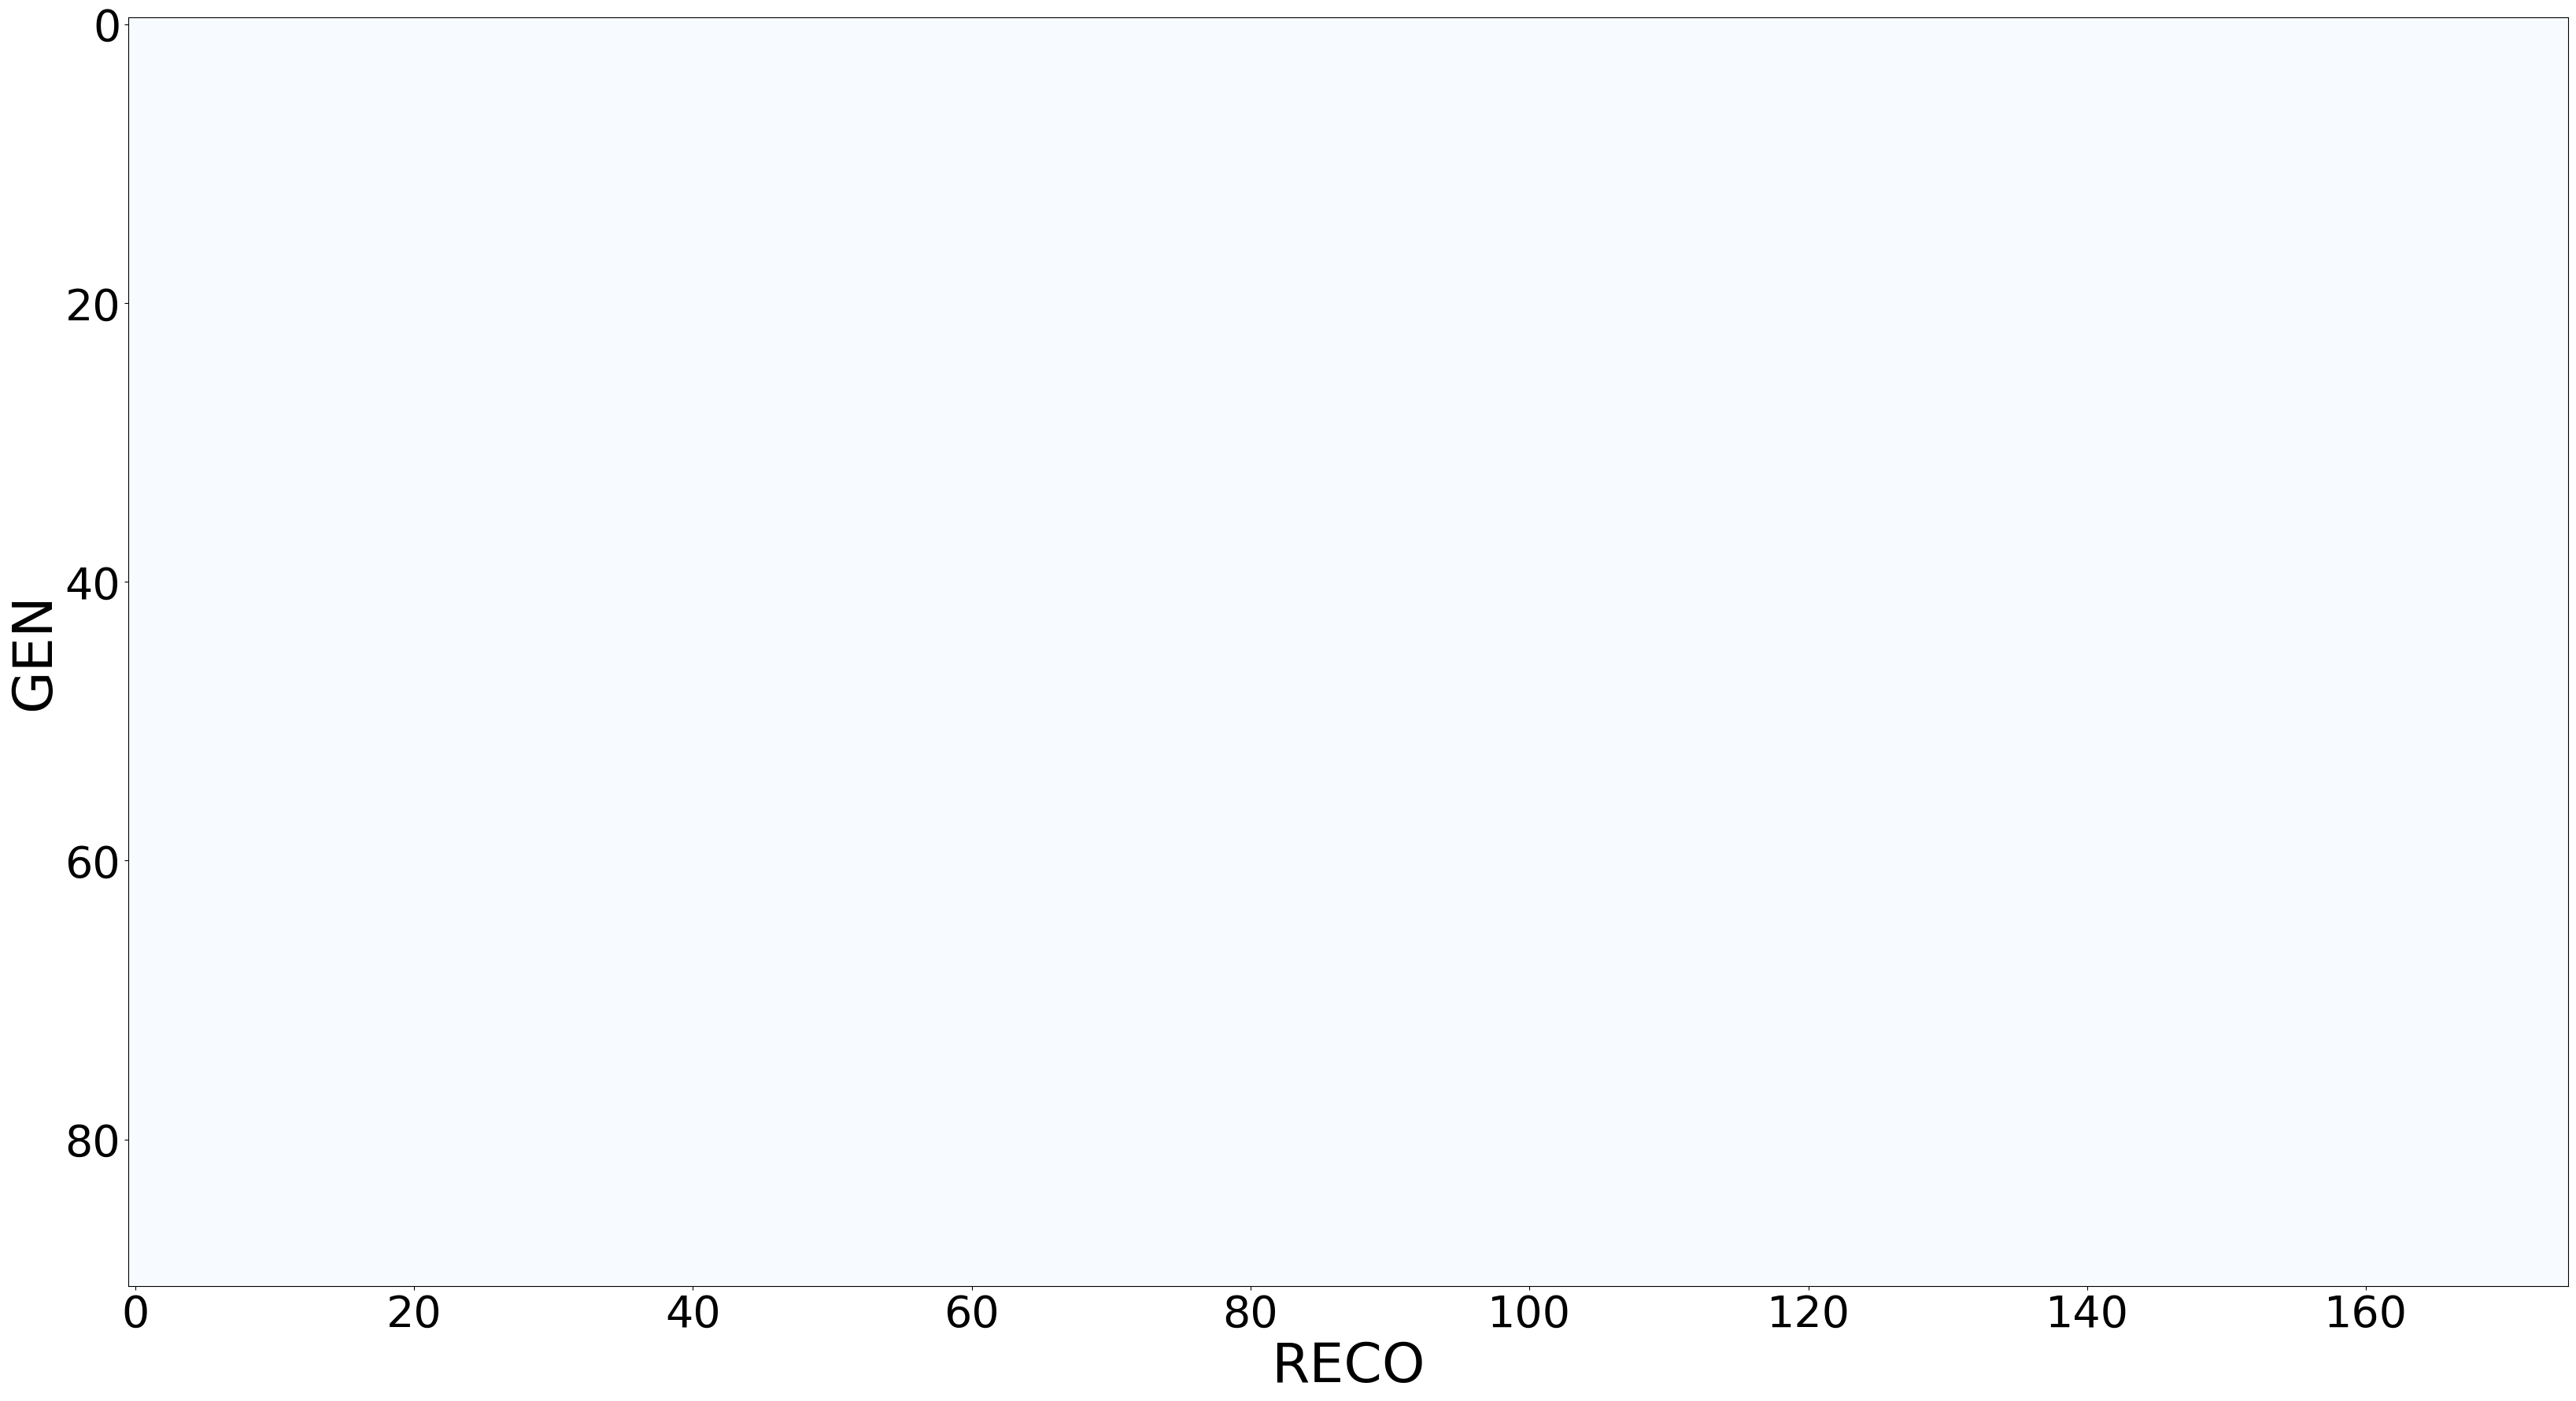

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize = (40,80))
plt.imshow( np.log(response_matrix_u_final+1), vmax=10, aspect="equal", cmap="Blues" )
plt.xlabel("RECO", fontsize=50)
plt.ylabel("GEN", fontsize=50)
plt.tick_params(labelsize=40)

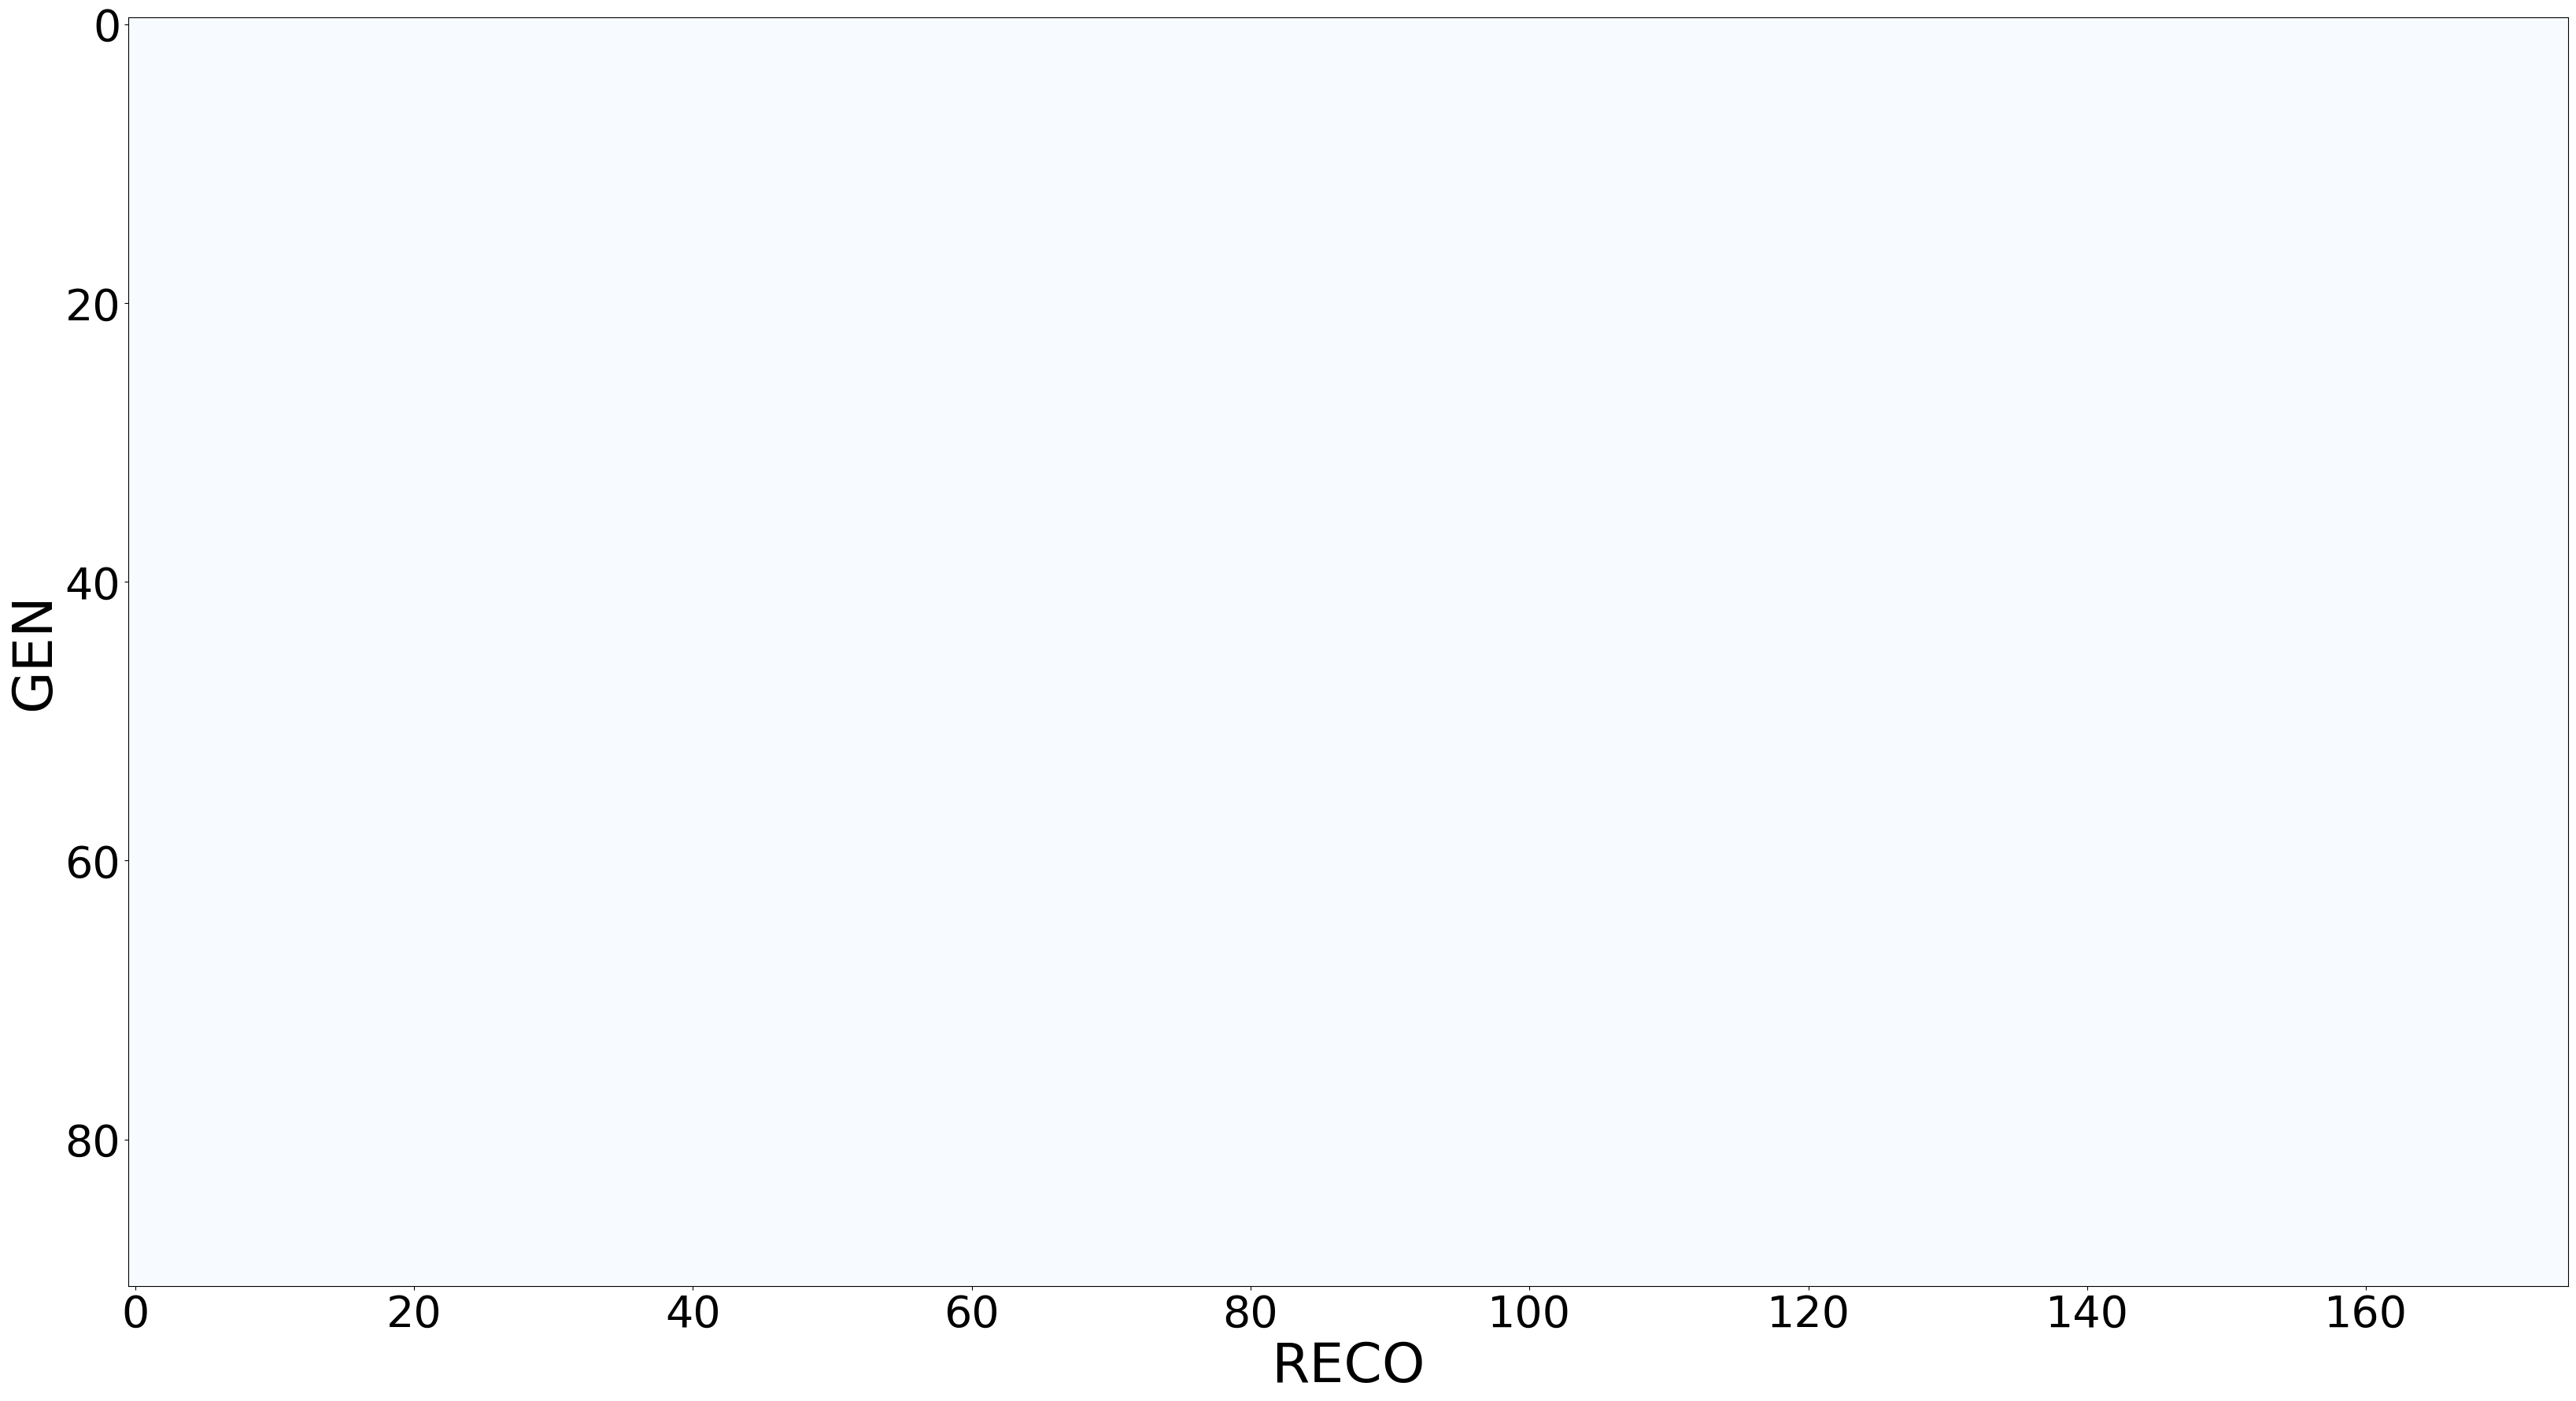

In [31]:
plt.figure(figsize = (40,80))
plt.imshow( np.log(response_matrix_g_final+1), vmax=10, aspect="equal", cmap="Blues" )
plt.xlabel("RECO", fontsize=50)
plt.ylabel("GEN", fontsize=50)
plt.tick_params(labelsize=40)

In [25]:
output['ptjet_mjet_u_reco'].project("ptreco").values()

array([0., 0., 0., 0., 0.])

In [51]:
a = output['ptjet_mjet_u_reco'].project('ptreco', 'mreco').values()
b = output['response_matrix_u'].project("ptreco", "mreco").values()

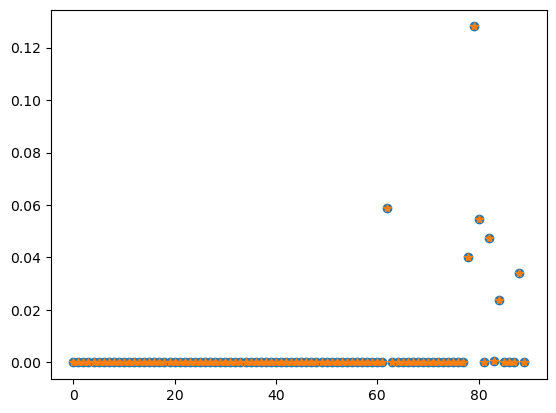

In [53]:
plt.plot(a.reshape(a.shape[0]*a.shape[1]), marker = 'o', linewidth = 0)
plt.plot(b.reshape(a.shape[0]*a.shape[1]), marker = '*', linewidth = 0)

In [54]:
a.shape[0]

5

In [55]:
a.shape[1]

18

In [32]:
c = output['response_matrix_u'].project('ptgen', 'mgen').values()

In [60]:
c.shape

(5, 9)

In [34]:
ak.ones_like([1,2,3], dtype = float)

<Array [1, 1, 1] type='3 * float64'>